In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [54]:
df  = pd.read_csv("Cleaned_Data/ce_setout_final_R.csv")

In [55]:
df

,Date,Time,Identifier,LineName,JobNumber,PONumber,SampleSize,cavity_identifier,DefectCode,DefectCount,Name
0,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,22bf2b29-6499-431d-92d4-3b611eb6db91,543,1,BREAKAGE
1,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,761c9653-dd85-44f9-a98d-905f2b01b112,543,1,BREAKAGE
2,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,0a338788-f21a-4a5d-a809-7c74d578ddaa,324,2,HEEL TAP
3,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,22bf2b29-6499-431d-92d4-3b611eb6db91,505,1,Bubble (>2.5 mm)
4,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,ad63c289-6eea-4f95-ad0a-f4c7622e7bc0,505,1,Bubble (>2.5 mm)
...,...,...,...,...,...,...,...,...,...,...,...
107535,2021-01-31,03:30:00,47a0a8cb-9535-4109-aa43-402222b0c9ed,J17,J18647,1021217,100,d7f2ba9b-9220-469c-8c6e-e13cbd010e3b,505,1,Bubble (>2.5 mm)
107536,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,dccb5b53-8fc4-4b35-b509-4979f6784fbe,505,1,Bubble (>2.5 mm)
107537,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,764819bb-e108-4e9a-9287-e584229b02df,505,1,Bubble (>2.5 mm)
107538,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,f2969450-f7cf-4579-8011-da2141fd70a1,324,1,HEEL TAP


In [56]:
df["Date"] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(["Time", "Identifier" , "JobNumber", "PONumber", "SampleSize", "cavity_identifier", "DefectCode", "DefectCount"], axis=1)

In [63]:
df

,Date,LineName,Name
0,2021-11-03 21:30:00,J16,BREAKAGE
1,2021-11-03 21:30:00,J16,BREAKAGE
2,2021-11-03 21:30:00,J16,HEEL TAP
3,2021-11-03 21:30:00,J16,Bubble (>2.5 mm)
4,2021-11-03 21:30:00,J16,Bubble (>2.5 mm)
...,...,...,...
107535,2021-01-31 03:30:00,J17,Bubble (>2.5 mm)
107536,2021-06-04 03:30:00,J18,Bubble (>2.5 mm)
107537,2021-06-04 03:30:00,J18,Bubble (>2.5 mm)
107538,2021-06-04 03:30:00,J18,HEEL TAP


In [64]:
df = df.drop_duplicates().reset_index()
df

,index,Date,LineName,Name
0,0,2021-11-03 21:30:00,J16,BREAKAGE
1,2,2021-11-03 21:30:00,J16,HEEL TAP
2,3,2021-11-03 21:30:00,J16,Bubble (>2.5 mm)
3,5,2021-11-03 21:30:00,J16,OFFSET BODY
4,7,2021-07-05 01:30:00,J14,HEEL TAP
...,...,...,...,...
51869,107530,2021-01-31 03:30:00,J17,Bubble (>2.5 mm)
51870,107532,2021-01-31 03:30:00,J17,SHOULDER CRACK
51871,107536,2021-06-04 03:30:00,J18,Bubble (>2.5 mm)
51872,107538,2021-06-04 03:30:00,J18,HEEL TAP


In [65]:
df1 = df.groupby(['Date', 'Name']).size().reset_index(name="count")
df1

,Date,Name,count
0,2021-01-01 01:30:00,BLISTER,1
1,2021-01-01 01:30:00,BREAKAGE,2
2,2021-01-01 01:30:00,Bubble (>2.5 mm),2
3,2021-01-01 01:30:00,HEEL TAP,1
4,2021-01-01 01:30:00,LAP MARK,1
...,...,...,...
41817,2022-12-01 22:30:00,BLANK SEAM,1
41818,2022-12-01 22:30:00,BLISTER,1
41819,2022-12-01 22:30:00,BREAKAGE,1
41820,2022-12-01 22:30:00,LOADING MARK,1


In [66]:
d = dict()


In [67]:
for ind in df1.index:
    if df1["count"][ind] not in d.keys():
        d[df1["count"][ind]]=1
    else:
        d[df1["count"][ind]]+=1

In [68]:
d = {k:v*100/len(df1) for k, v in d.items()}

In [78]:
d

{1: 80.70632681363875,
 2: 15.312514944287695,
 4: 0.5977715078188514,
 3: 3.30448089522261,
 5: 0.07412366696953757,
 6: 0.00478217206255081}

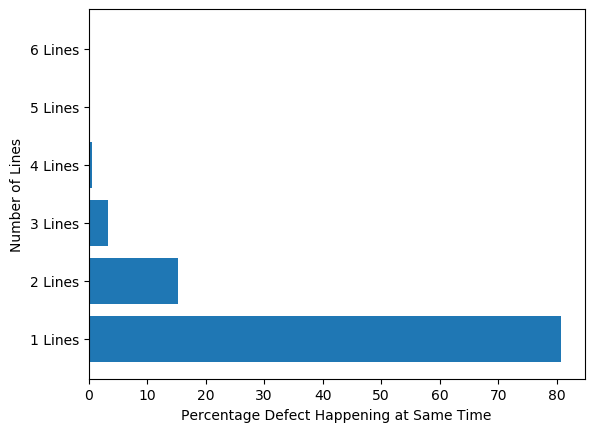

In [79]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ["6 Lines", "5 Lines", "4 Lines", "3 Lines", "2 Lines", "1 Lines"]
y_pos = np.arange(len(people))
scaled_Importance = [0.00478217206255081, 0.07412366696953757, 0.5977715078188514, 3.30448089522261,
                     15.312514944287695, 80.70632681363875]

ax.barh(y_pos, scaled_Importance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage Defect Happening at Same Time')
ax.set_ylabel('Number of Lines')
# ax.set_title('Variable Importance Plot')

plt.show()
